<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Regression_Version000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/KOA-EMG/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")


In [ ]:
dataset.head(10)

,Patient ID,WOMAC_total,WOMAC Severity,DataType,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,...,Lyapunov_TIBIALIS ANT,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13308,22,Mild,Training,49.2,92.1,51.8,101.6,91.7,88.8,...,0.20,48.935608,120.815090,86.949185,49.662771,30.602679,101.914340,1.014860,0.253302,1.172114
1,13489,35,Mild,Training,116.0,232.8,104.6,225.5,79.7,120.1,...,0.26,52.187204,244.146045,46.506634,189.255449,211.104414,134.602751,3.626472,0.864664,2.894270
2,13489,35,Mild,Training,101.4,55.7,76.0,63.9,122.8,74.3,...,0.25,70.259125,70.225682,75.729112,141.818740,28.911669,211.453368,2.018510,0.411697,2.792234
3,13532,33,Mild,Training,139.7,46.0,69.5,88.5,169.0,35.8,...,0.30,151.986792,28.925641,219.105386,123.184526,78.659590,70.327124,0.810495,2.719372,0.320974
4,13549,30,Mild,Training,113.5,40.2,112.2,38.5,276.0,107.6,...,0.40,145.992226,53.319007,377.515540,79.111070,20.960417,121.125857,0.541885,0.393113,0.320850
5,13603,24,Mild,Training,138.9,46.9,88.5,75.0,196.4,59.9,...,0.30,117.810653,73.077828,110.776839,162.105887,12.947782,332.512464,1.375987,0.177178,3.001642
6,13603,24,Mild,Training,115.7,116.3,59.4,98.7,105.5,111.5,...,0.20,145.036660,170.309456,111.502357,81.943900,28.319855,95.662700,0.564987,0.166285,0.857943
7,14017,27,Mild,Training,120.9,117.8,148.3,111.1,134.5,113.2,...,0.20,112.554201,129.825565,113.366679,131.194966,96.447210,172.600617,1.165616,0.742898,1.522499
8,14315,22,Mild,Training,383.6,90.8,248.2,116.0,316.6,71.2,...,0.50,272.857378,113.760720,269.374236,527.035183,53.072994,405.670765,1.931541,0.466532,1.505975
9,14320,32,Mild,Training,516.5,112.9,476.1,120.8,642.5,53.6,...,0.51,450.214119,168.273023,322.676333,602.362752,18.657880,1245.728157,1.337947,0.110879,3.860612


In [ ]:
dataset.shape

(150, 88)

In [ ]:
X = dataset.iloc[:,4:]
y = dataset.iloc[:, 1]

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 30


In [ ]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

                      Specs     Score
80           Swing_CCI_TA-G  3.824733
81  swing/stance_cci(TA_RF)  3.055398
12                Step_Time  2.256754
11              Step_Length  2.011332
10            Stride_Length  1.991660
8                   Cadence  1.916946
34     Max-Min T_MEDIAL HAM  1.815930
83   swing/stance_CCI(TA-G)  1.724589
58     Lin_reg_TIBIALIS ANT  1.650605
3                  CCI_G-RF  1.594176
9                     Speed  1.547062
53            Average_AUC_F  1.430273
26         Max T_MEDIAL HAM  1.401292
4                  CCI_TA-G  1.314952
71          Lyapunov_RECTUS  1.311960
43       Average_Integral_U  1.311572
46              Area_RECTUS  1.310099
67            Stddev_RECTUS  1.277695
78          Swing_CCI_TA-RF  1.240789
21               Min_RECTUS  1.237807
56       Lin_reg_MEDIAL HAM  1.225179
57    Lin_reg_GASTROCNEMIUS  1.212877
6                   CCI_L-H  1.206483
37          Integral_RECTUS  1.188077
72      Lyapunov_MEDIAL HAM  1.173754
2           

In [ ]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [ ]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


In [ ]:
print(y_pred.shape)

(30,)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.14032251131333906

In [ ]:
r_sq = lin_reg.score(X_new, y_new)
print(r_sq)

0.37140451200586344


In [ ]:
r_sq_test = lin_reg.score(X_test, y_pred)
print(r_sq_test)

0.7188598970531929


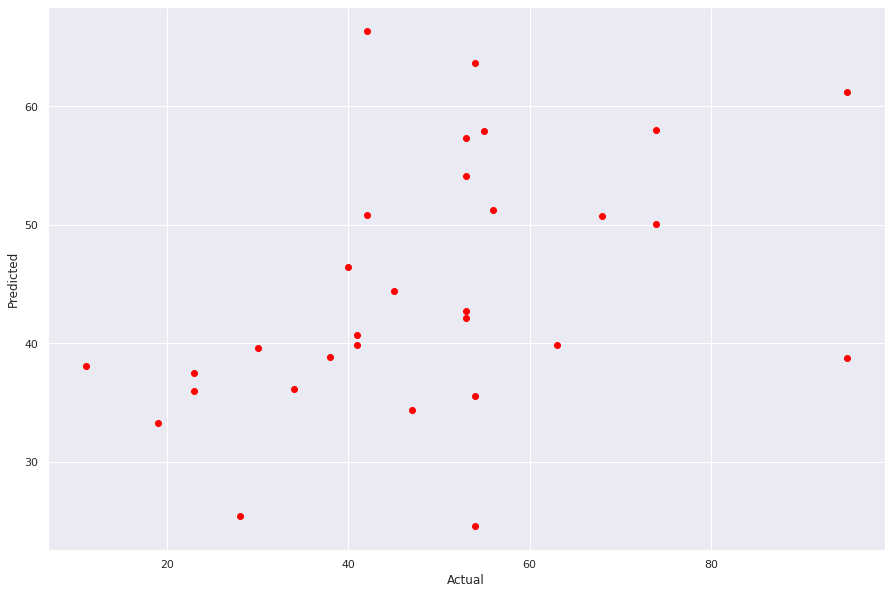

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred,
        "Difference":y_test-y_pred
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
120,23,35.939797,-12.939797
121,19,33.270489,-14.270489
122,11,38.112780,-27.112780
123,30,39.566238,-9.566238
124,23,37.512483,-14.512483
125,34,36.153943,-2.153943
126,28,25.396453,2.603547
127,40,46.416083,-6.416083
128,42,66.340449,-24.340449
129,42,50.852712,-8.852712


In [ ]:
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-0.022120 0.404034 118.792904 -0.652799 0.278744 1.139336 0.116561
 0.393041 5.033508 -0.043281 -0.282174 196.475861 0.130494 0.024930
 40.453767 -0.001977 -98.237411 0.316888 -0.032954 0.250342 2.016267
 4.306507 0.109311 -0.002818 -21.216149 -0.040271 0.195137 -0.000600
 -0.006106 -98.236068]
Mean squared error: 327.51
Coefficient of determination: 0.14


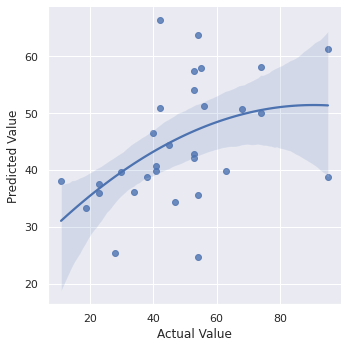

In [ ]:
import seaborn as sns


scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

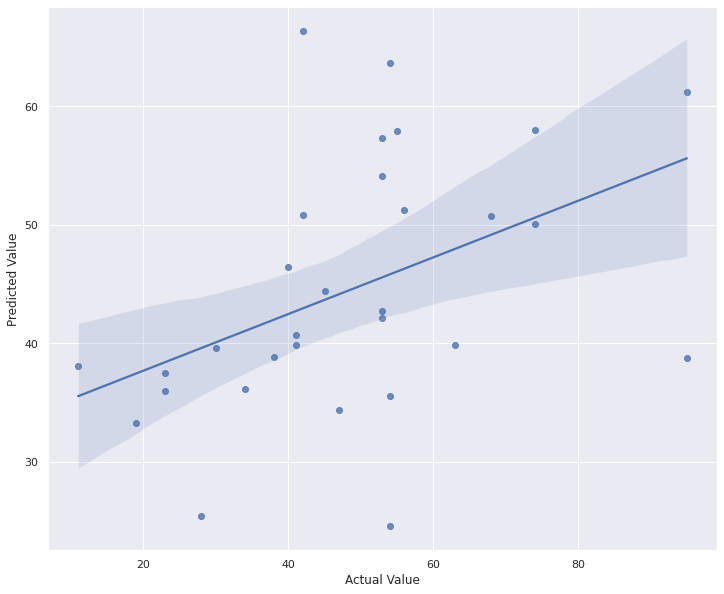

In [ ]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})



In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/SNU Research/KOA-EMG/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(150, 88)


,Patient ID,WOMAC_total,WOMAC Severity,DataType,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,...,Lyapunov_TIBIALIS ANT,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13308,22,Mild,Training,49.2,92.1,51.8,101.6,91.7,88.8,...,0.20,48.935608,120.815090,86.949185,49.662771,30.602679,101.914340,1.014860,0.253302,1.172114
1,13489,35,Mild,Training,116.0,232.8,104.6,225.5,79.7,120.1,...,0.26,52.187204,244.146045,46.506634,189.255449,211.104414,134.602751,3.626472,0.864664,2.894270
2,13489,35,Mild,Training,101.4,55.7,76.0,63.9,122.8,74.3,...,0.25,70.259125,70.225682,75.729112,141.818740,28.911669,211.453368,2.018510,0.411697,2.792234
3,13532,33,Mild,Training,139.7,46.0,69.5,88.5,169.0,35.8,...,0.30,151.986792,28.925641,219.105386,123.184526,78.659590,70.327124,0.810495,2.719372,0.320974
4,13549,30,Mild,Training,113.5,40.2,112.2,38.5,276.0,107.6,...,0.40,145.992226,53.319007,377.515540,79.111070,20.960417,121.125857,0.541885,0.393113,0.320850


In [ ]:
# Checking for null values

raw_data.isnull().sum()

Patient ID                 0
WOMAC_total                0
WOMAC Severity             0
DataType                   0
CCI_TA-RF                  0
                          ..
Swing_CCI_G-MH             0
Swing_CCI_TA-G             0
swing/stance_cci(TA_RF)    0
swing/stance_cci(G-MH)     0
swing/stance_CCI(TA-G)     0
Length: 88, dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Patient ID :89
The number of values for feature WOMAC_total :55
The number of values for feature WOMAC Severity :3 -- ['Mild' 'Moderate' 'Severe']
The number of values for feature DataType :2 -- ['Testing' 'Training']
The number of values for feature CCI_TA-RF :147
The number of values for feature CCI_G-MH :144
The number of values for feature CCI_TA-MH :146
The number of values for feature CCI_G-RF :140
The number of values for feature CCI_TA-G :144
The number of values for feature CCI_MH-RF :148
The number of values for feature CCI_L-H :144
The number of values for feature CCI_F-B :148
The number of values for feature Cadence :118
The number of values for feature Speed :132
The number of values for feature Stride_Length :130
The number of values for feature Step_Length :107
The number of values for feature Step_Time :6 -- [0.400000 0.500000 0.600000 0.700000 0.800000 1.000000]
The number of values for feature Single_Support :91
The number of values fo

In [ ]:
# Visualize the data using seaborn Pairplots

#g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [ ]:
raw_data.columns

Index(['Patient ID', 'WOMAC_total', 'WOMAC Severity', 'DataType', 'CCI_TA-RF',
       'CCI_G-MH', 'CCI_TA-MH', 'CCI_G-RF', 'CCI_TA-G', 'CCI_MH-RF', 'CCI_L-H',
       'CCI_F-B', 'Cadence', 'Speed', 'Stride_Length', 'Step_Length',
       'Step_Time', 'Single_Support', 'IDS', 'TDS', 'Total_Support',
       'Weight_Accept', 'Weight_Release', 'Stance', 'Swing', ' Min_RECTUS',
       ' Min_MEDIAL HAM', ' Min_GASTROCNEMIUS', ' Min_TIBIALIS ANT',
       ' Max T_RECTUS', ' Max T_MEDIAL HAM', ' Max T_GASTROCNEMIUS',
       ' Max T_TIBIALIS ANT', ' Min T_RECTUS', ' Min T_MEDIAL HAM',
       ' Min T_GASTROCNEMIUS', ' Min T_TIBIALIS ANT', 'Max-Min T_RECTUS',
       'Max-Min T_MEDIAL HAM', ' Max-Min T_GASTROCNEMIUS',
       ' Max-Min T_TIBIALIS ANT', ' Integral_RECTUS', ' Integral_MEDIAL HAM',
       ' Integral_GASTROCNEMIUS', ' Integral_TIBIALIS ANT', 'Average_Integral',
       'Average_Integral_L', 'Average_Integral_U', 'Average_Integral_F',
       'Average_Integral_B', ' Area_RECTUS', ' Area_MEDI

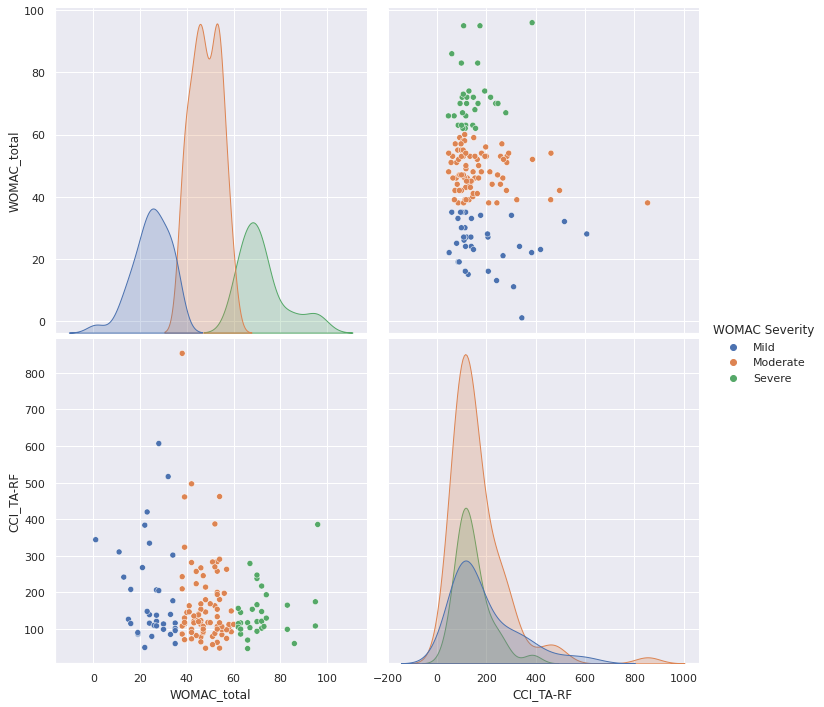

In [ ]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['WOMAC Severity', 'WOMAC_total', 'CCI_TA-RF']], hue = 'WOMAC Severity', height = 5)

In [ ]:
# Visualising a Subset of our data - important features

'''g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)'''

"g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, \n              scatter_kws = {'color':'green'}, ci = False)"

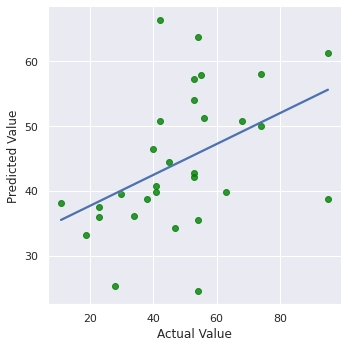

In [ ]:
# Visualising a Subset of our data - important features

g = sns.lmplot(x="Actual Value", y="Predicted Value", data = pred_y_df, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

In [ ]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
#print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.4481385350549415
The Accuracy n2  on the training dataset is:  0.4481385350549415

The Accuracy  on the testing dataset is:  0.14032251131333906

The RMSE  on the training dataset is:  12.505403723289717
The RMSE  on the testing dataset is:  18.097353355023664

The MAE  on the training dataset is:  10.0707556263496
The MAE  on the testing dataset is:  13.338143747702611


Intercept:  -118.87427937698666


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

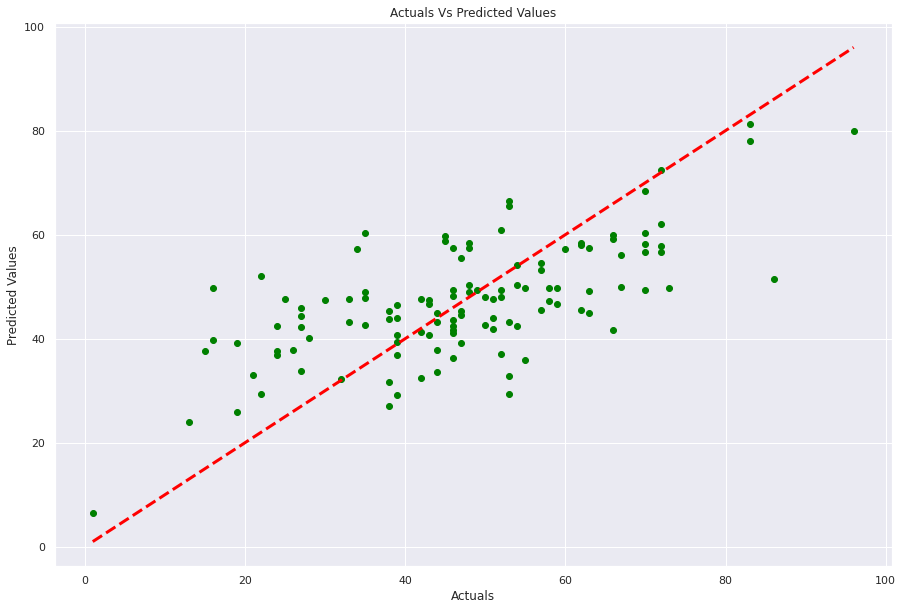

In [ ]:
# Plotting Actuals Vs Predicted for training

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actuals Vs Residuals')

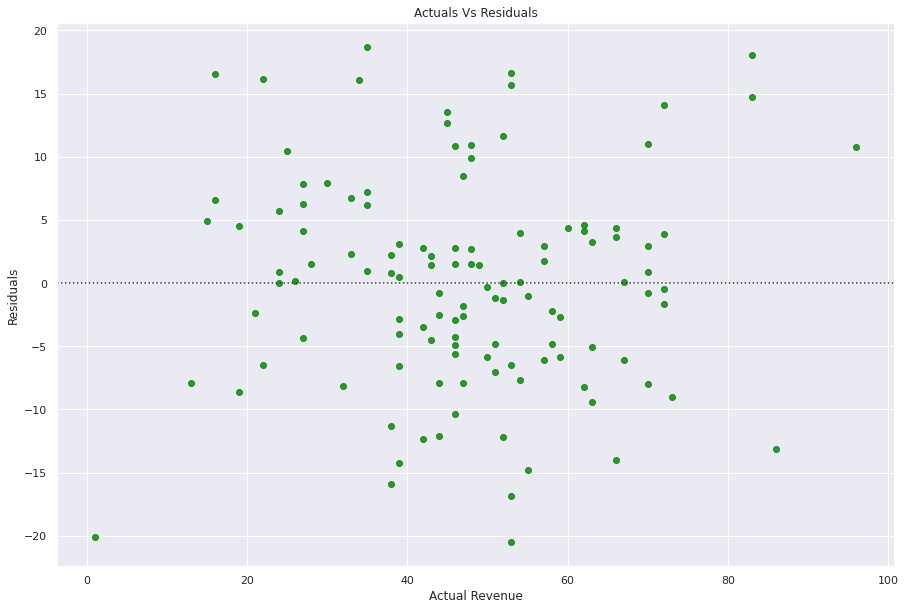

In [ ]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred =reg.predict(X_test)
print(reg.coef_)
reg.intercept_

[-0.019996 2.020274 17.431553 -0.300037 0.357674 0.718215 0.105981
 -0.667228 4.456435 -0.039811 -0.544711 0.407274 0.124335 0.021729
 16.412993 -0.001627 -0.203401 0.424807 -0.038371 0.237804 4.265162
 2.392905 0.088270 -0.001035 -9.032809 0.005235 0.221190 -0.025391
 -0.006178 -0.201921]


-20.77353817784391

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)

reg.predict(X_test)
reg.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+02, tolerance: 3.401e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([-0.021968, 2.416115, 0.000000, -0.132408, 0.274110, 0.613412,
       0.085434, -0.003097, 0.000000, -0.037981, -0.540661, 0.000193,
       0.124218, 0.023657, 6.982057, -0.001434, -0.000054, 0.456559,
       -0.039902, 0.207413, 0.637454, 0.489548, 0.087450, -0.000351,
       -0.000000, 0.011529, 0.194089, -0.027799, -0.006189, 0.001312])

In [ ]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.coef_


array([-0.021971, 2.416015, 0.000000, -0.132368, 0.274099, 0.613409,
       0.085435, -0.002731, 0.000000, -0.037979, -0.540662, 0.000081,
       0.124220, 0.023659, 6.983733, -0.001434, 0.000000, 0.456737,
       -0.039900, 0.207378, 0.637377, 0.489713, 0.087448, -0.000350,
       0.000000, 0.011527, 0.193895, -0.027803, -0.006189, 0.001370])

In [ ]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.coef_


array([-0.004807, 0.000003, -0.000001, -0.000239, -0.000469, 0.000346,
       0.000078, -0.000012, 0.000000, 0.001077, -0.000206, 0.001215,
       0.000284, -0.001639, 0.000000, 0.000349, 0.000128, 0.000013,
       -0.000556, 0.000003, 0.000001, 0.000003, 0.001435, -0.000119,
       -0.000001, 0.000275, 0.000018, -0.000688, -0.005565, 0.002302])

In [ ]:
from sklearn.linear_model import TweedieRegressor

reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X_train, y_train)
reg.predict(X_test)
reg.coef_


reg.intercept_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * fami

3.8533340090794668

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np



poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)



array([[1.000000, 49.200000, 92.100000, ..., 0.064162, 0.296899,
        1.373851],
       [1.000000, 116.000000, 232.800000, ..., 0.747645, 2.502572,
        8.376798],
       [1.000000, 101.400000, 55.700000, ..., 0.169494, 1.149553,
        7.796568],
       ...,
       [1.000000, 108.000000, 185.100000, ..., 3.715430, 4.366200,
        5.130956],
       [1.000000, 99.500000, 95.300000, ..., 0.039990, 0.548786,
        7.530985],
       [1.000000, 153.700000, 98.500000, ..., 0.037638, 0.441634,
        5.181952]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([3.000000, -2.000000, 1.000000, -1.000000])